# Dinámica de las ecuaciones de Lorentz clásicas: exponentes de Liapunov y exploración de los parámetros.

Estos son los módulos a utilizar:

In [1]:
include("Taylor.jl")
using TS

In [2]:
include("Lorenz.jl")
using LZ

Los parámetros $\sigma, \beta$ que utilzamos son:

In [3]:
sigma = 10;
b = 8/3;

In [21]:
?lorenz

search: lorenz diflorenz set_bigfloat_precision get_bigfloat_precision



lorenz(t0,tf,x0,y0,z0,r,sigma,b,p)

Resuelve las ecuaciones de Lorenz con parámetros r, sigma, b y condiciones iniciales (x0,y0,z0) del tiempo inicial t0 al tiempo final tf. Las solución se hace mediante el método de Taylor con polinomios de Taylor hasta orden p.

Devuelve cuatro listas

t, x, y, z

con las soluciones.


In [4]:
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,28,sigma,b,20);

In [5]:
using PyPlot
using PyCall
plt = PyPlot

PyPlot

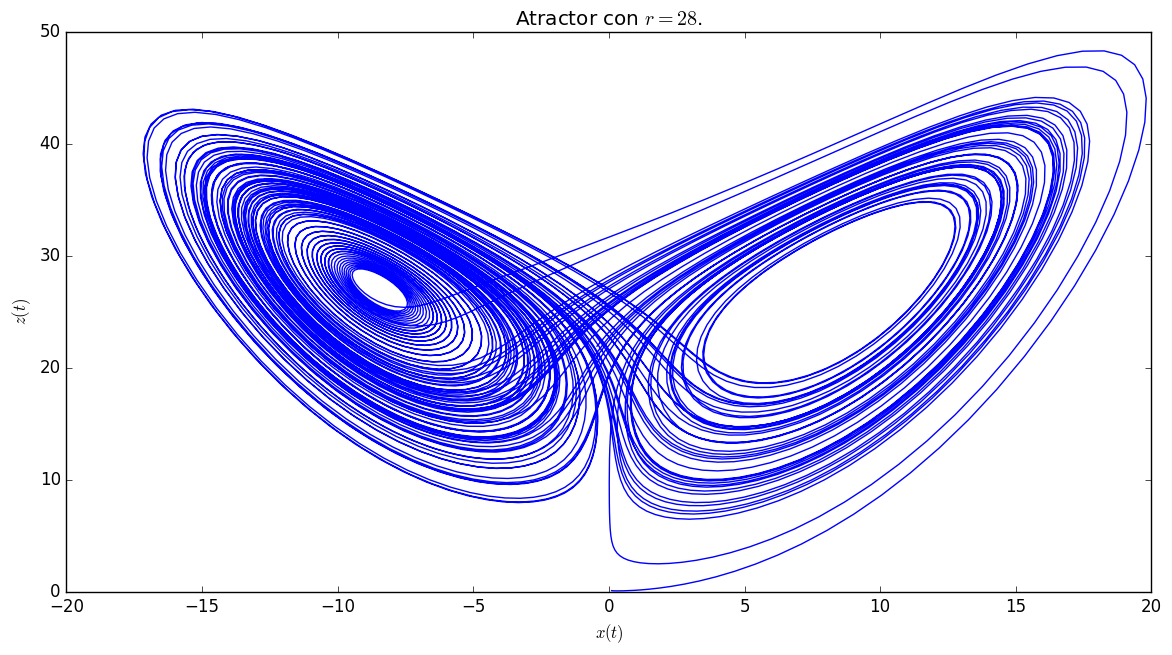

In [6]:
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Atractor con $r = 28$.");
show()

## Problema 9.3.2

$r = 10$

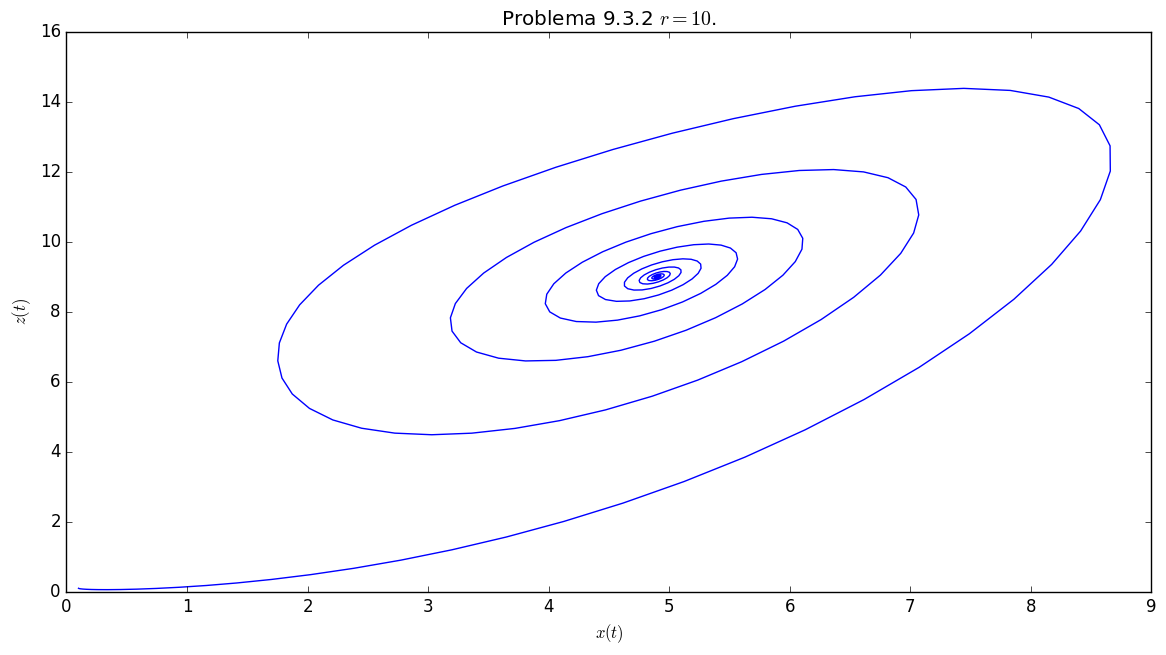

In [7]:
r = 10
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,r,sigma,b,20)
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.2 $r = 10$.");
show()

## Problema 9.3.3

$r = 22$

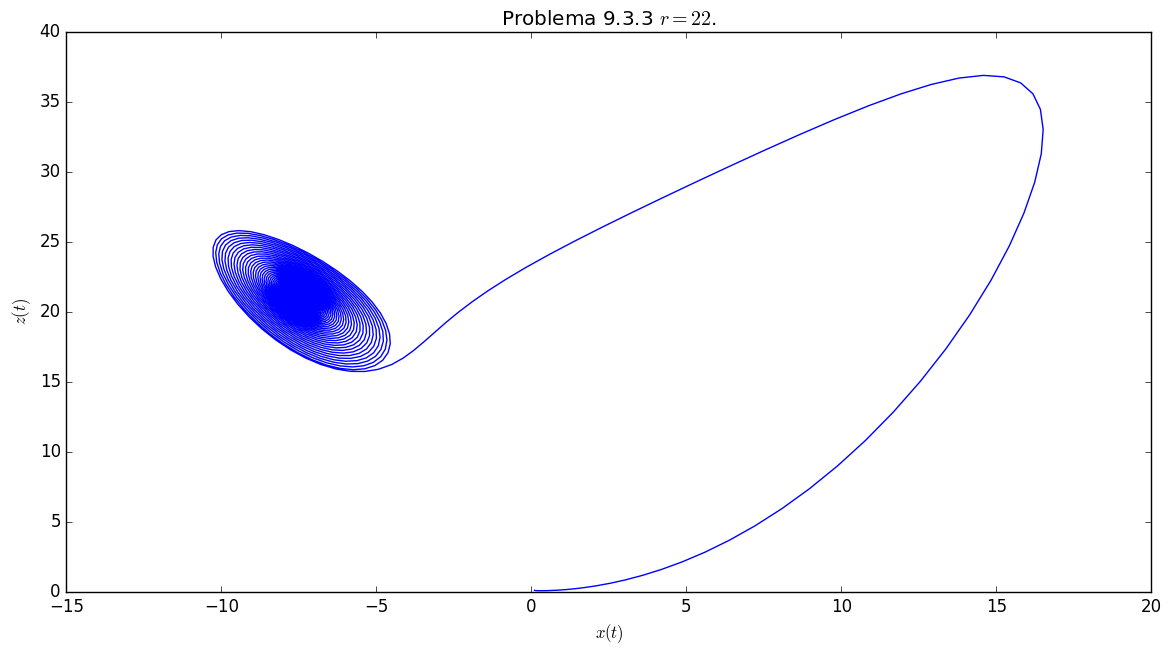

In [8]:
r = 22
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,r,sigma,b,20)
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.3 $r = 22$.");
show()

## Problema 9.3.4

$r = 24.5$

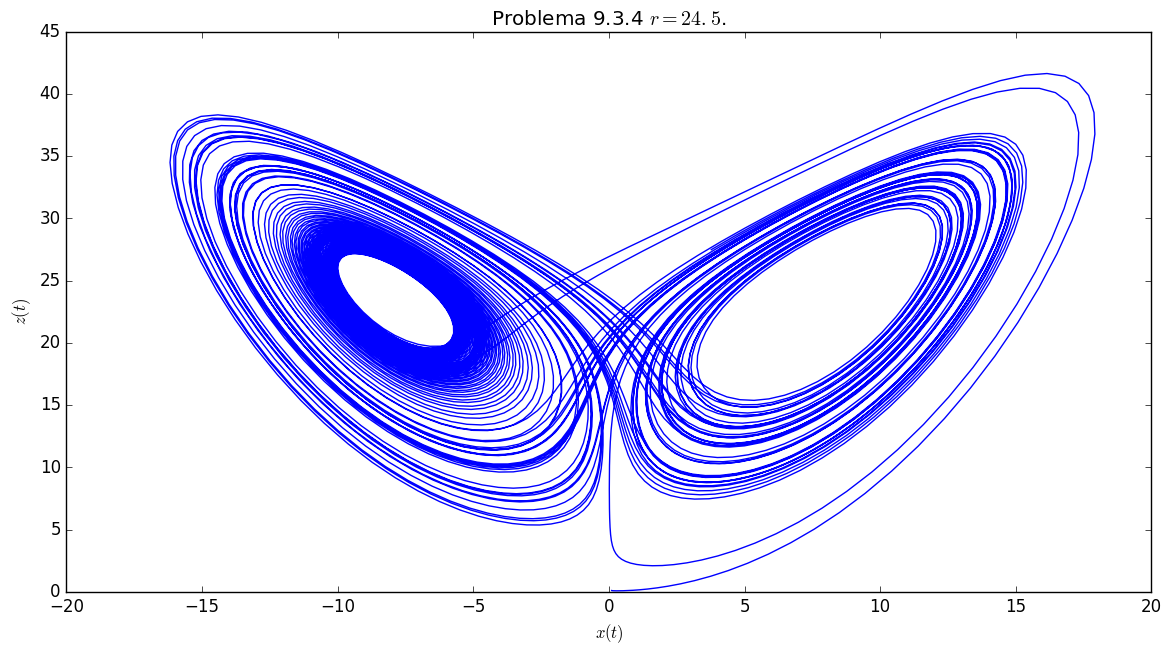

In [9]:
r = 24.5
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,r,sigma,b,20)
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.4 $r = 24.5$.");
show()

## Problema 9.3.5

$r = 100$

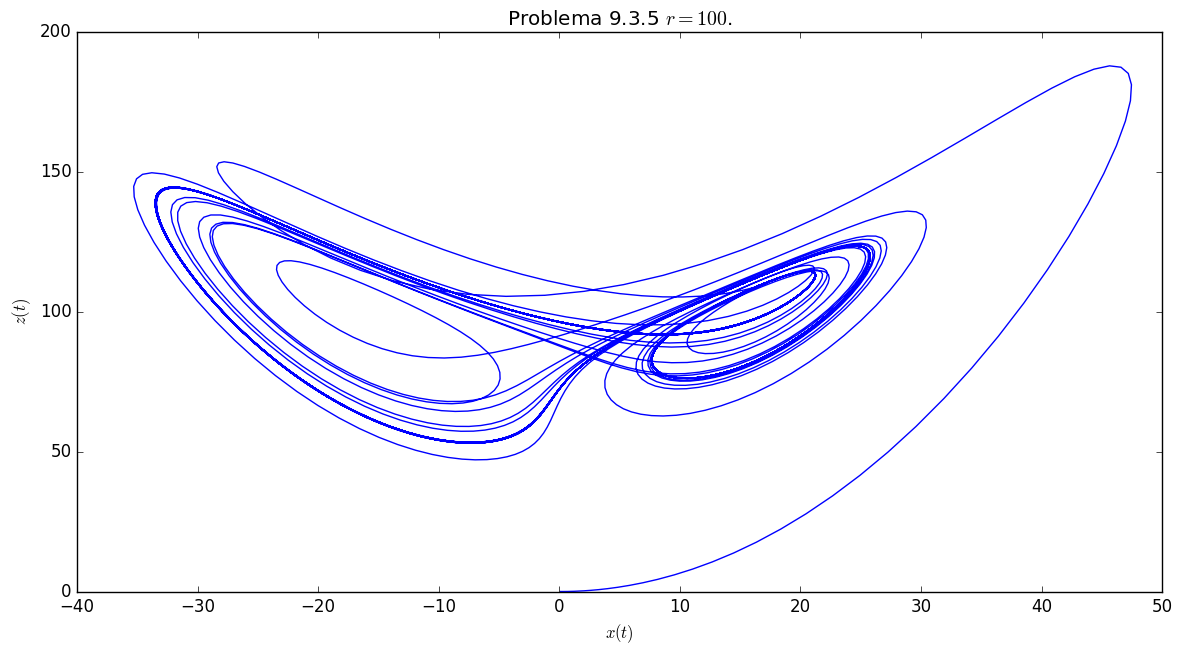

In [10]:
r = 100
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,r,sigma,b,20)
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.5 $r = 100$.");
show()

## Problema 9.3.6

$r = 126.52$

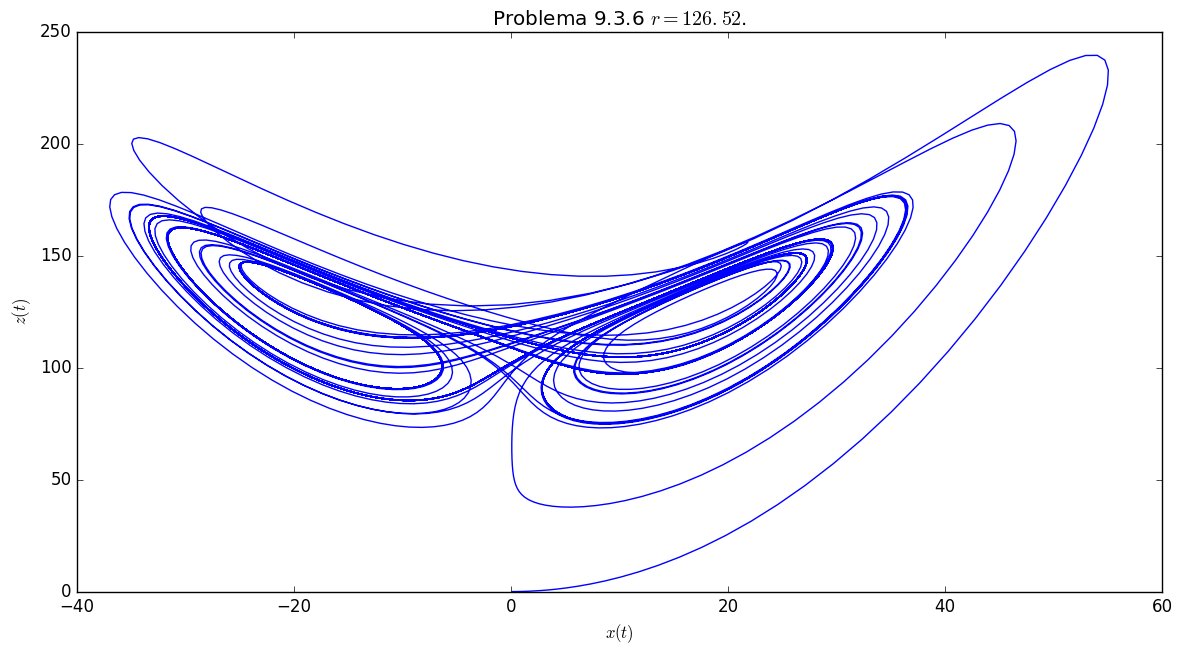

In [11]:
r = 126.52
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,r,sigma,b,20)
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.6 $r = 126.52$.");
show()

## Problema 9.3.7

$r = 400$

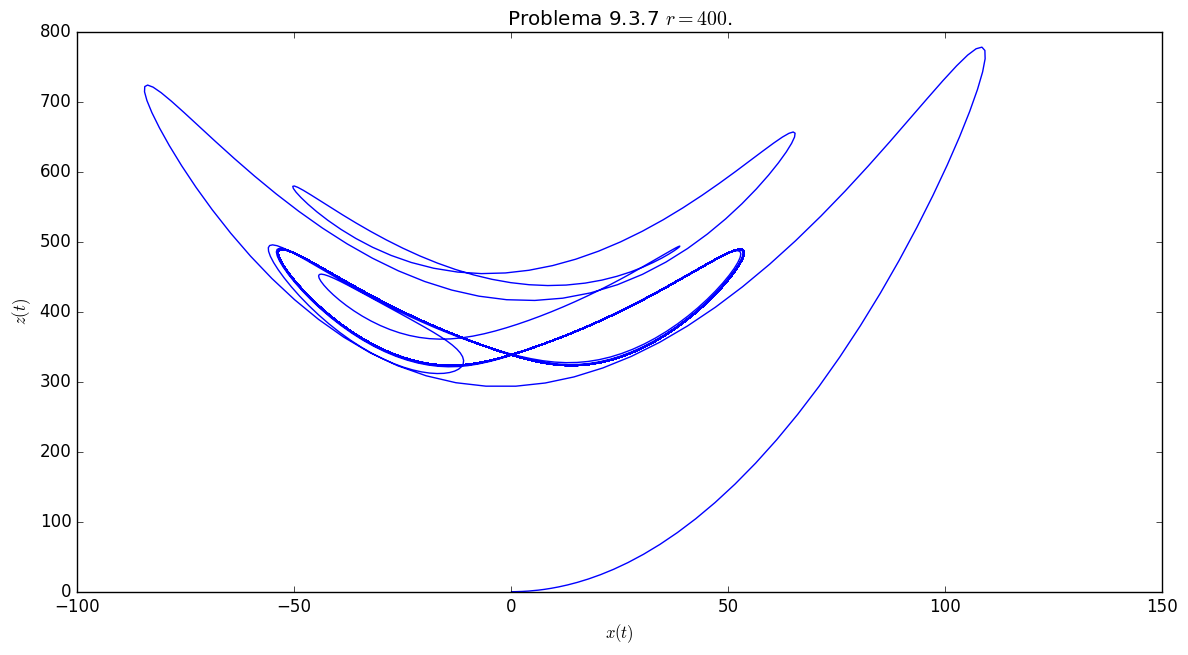

In [12]:
r = 400
t,x,y,z = lorenz(0.0,100,0.1,0.1,0.1,r,sigma,b,20)
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x,z);
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.7 $r = 400$.");
show()

## Problema 9.3.9
$r = 28$

Separación entre trayectorias iniciales $10^{-15}$.

In [22]:
?diflorenz

search: diflorenz



lorenzdif(t0,tf,x01,y01,z01,x02,y02,z02,r,sigma,b,p)

Resuelve las ecuaciones de Lorenz con parámetros r, sigma, b para dos condiciones iniciales diferentes. La primera es un sistema con (x01,y01,z01) y el segundo sistema es (x02,y02,z02). Los dos sistemas se resuelven a los mismos intervalos de tiempo dados en la lista t.

Devuelve siete listas

t, x1, y1, z1, x2, y2, z2

con las soluciones de los dos sistemas y la lista de tiempos.


In [13]:
r = 28
t, x1, y1, z1, x2, y2, z2 = diflorenz(0.0,100,0.1,0.1,0.1,0.1+1.0e-15,0.1,0.1,r,sigma,b,20);

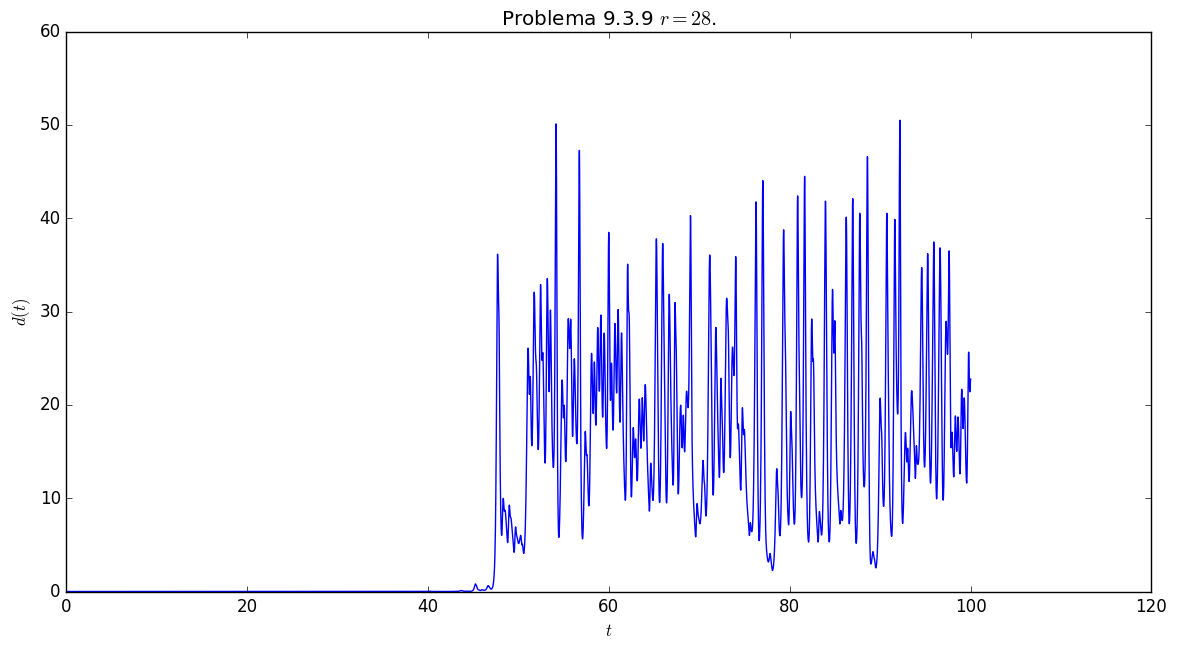

In [14]:
d = [sqrt((x1[i]-x2[i])^2 + (y1[i]-y2[i])^2 + (z1[i]-z2[i])^2) for i in range(1,length(x1))]
ld = [log(d[i]) for i in range(1,length(d))]

fig = figure("taylor_solution", figsize=(14,7))
plt.plot(t,d);
plt.ylabel(L"$d(t)$");
plt.xlabel(L"$t$");
plt.title(L"Problema 9.3.9 $r = 28$.");
show()

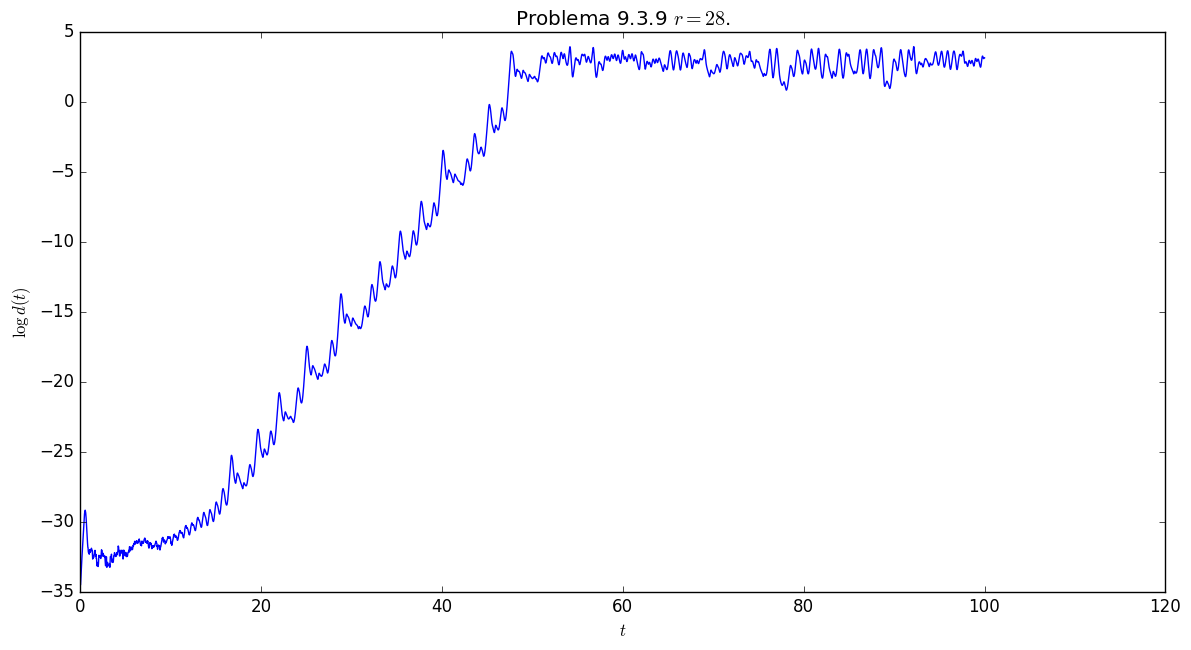

In [15]:
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(t,ld);
plt.ylabel(L"$\log \,d(t)$");
plt.xlabel(L"$t$");
plt.title(L"Problema 9.3.9 $r = 28$.");
show()

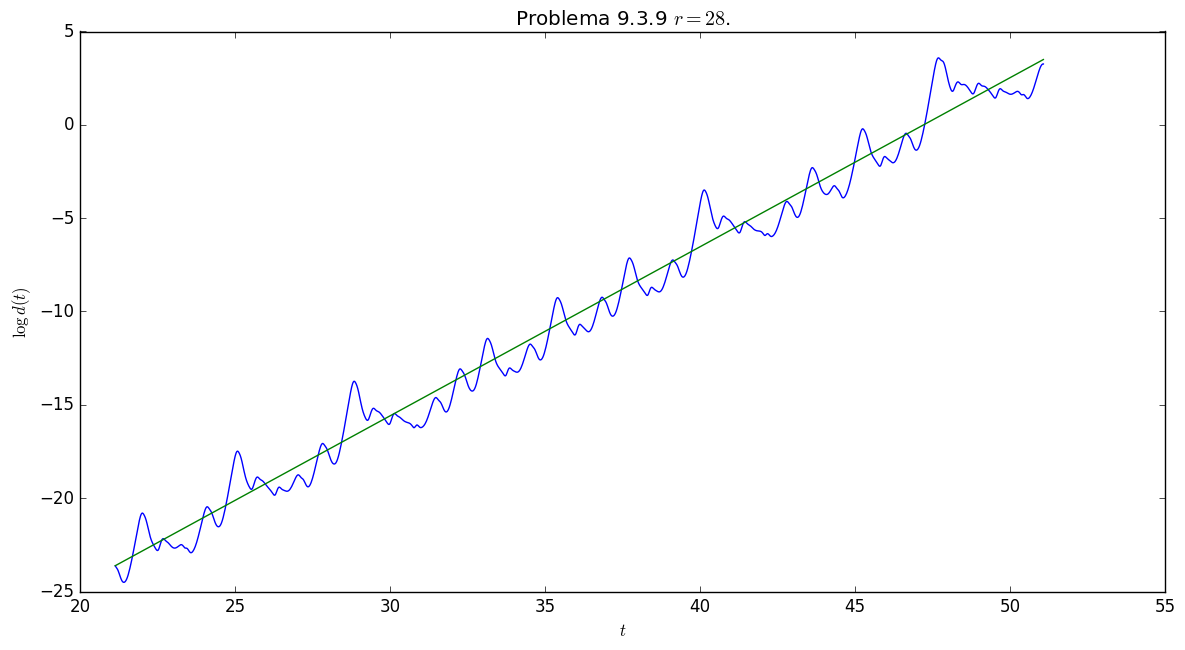

In [16]:
data_x = t[1200:3200]
data_y = ld[1200:3200]
x_mean = mean(data_x)
y_mean = mean(data_y)
m = sum([(data_x[i]-x_mean)*(data_y[i]-y_mean) for i in range(1,length(data_x))])/sum([(data_x[i]-x_mean)^2 for i in range(1,length(data_x))])
b = y_mean - m*x_mean
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(data_x,data_y);
plt.plot(data_x,m*data_x + b)
plt.ylabel(L"$\log \,d(t)$");
plt.xlabel(L"$t$");
plt.title(L"Problema 9.3.9 $r = 28$.");
show()

La pendiente o exponente de Liapunov $\lambda$ es:

In [17]:
m

0.905755799867654

# Problema 9.3.10

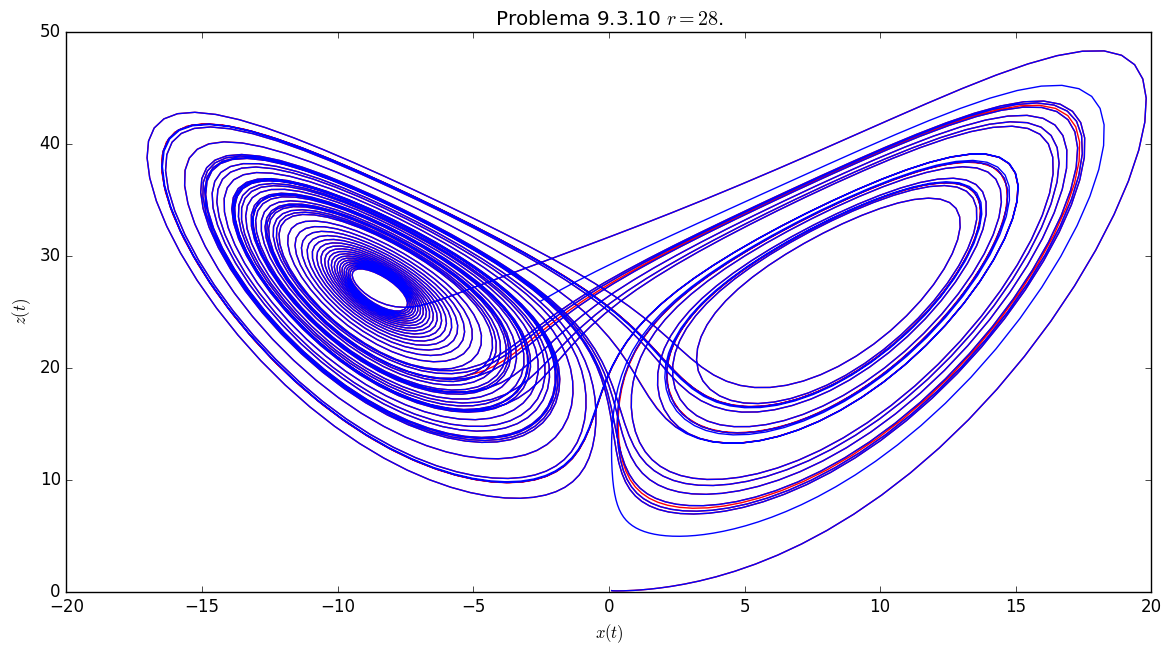

In [18]:
fig = figure("taylor_solution", figsize=(14,7))
plt.plot(x1[1:3000],z1[1:3000], "-r");
plt.plot(x2[1:3000],z2[1:3000], "-b");
plt.ylabel(L"$z(t)$");
plt.xlabel(L"$x(t)$");
plt.title(L"Problema 9.3.10 $r = 28$.");
show()

Se ve "a ojo" que ya existe una separación entre las dos curvas a $t \approx 2800$, si queremos ser más específicos, suponga que queremos saber en qué punto la diferencia entre las trayectorias ya excede $10^{-3}$:

In [19]:
for i in range(1, length(d))
    if abs(d[i]) > 1.0e-3
        println("La sepración excede la tolerancia en t = ", t[i])
        break
    end
end

La sepración excede la tolerancia en t = 39.713024209184255


## Problema 9.5.1

$r = 166.3$